In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [56]:
# Verificar sin indice 
df= pd.read_csv('DataAnalytics.csv')
df

,Administrador,Usuario,botón correcto,tiempo de interacción,mini juego,número de interacción,color presionado,dificultad,fecha,Juego,auto push,tiempo de lección,tiempo de sesión
0,nicolas,nicolas,1.0,5.399169,Despegue,1.0,blue,Episodio 1,25/01/2024 09:26:42 a. m.,Astro,0.0,0.000000,0.000000
1,nicolas,nicolas,0.0,1.283400,Despegue,2.0,violet,Episodio 1,25/01/2024 09:26:46 a. m.,Astro,0.0,0.000000,0.000000
2,nicolas,nicolas,1.0,2.700226,Despegue,3.0,green,Episodio 1,25/01/2024 09:26:48 a. m.,Astro,0.0,0.000000,0.000000
3,nicolas,nicolas,0.0,3.050262,Despegue,4.0,green,Episodio 1,25/01/2024 09:26:57 a. m.,Astro,0.0,0.000000,0.000000
4,nicolas,nicolas,0.0,4.750256,Despegue,5.0,green,Episodio 1,25/01/2024 09:26:58 a. m.,Astro,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860,ALEIDA,ESMERALDA,NaN,NaN,NaN,NaN,NaN,Episodio 1,28/05/2024 04:15:49 p. m.,Astro,NaN,NaN,332.240000
5861,ALEIDA,JOSE JAVIER,0.0,2.135419,Asteroides,1.0,green,Episodio 3,04/06/2024 11:09:54 a. m.,Astro,0.0,0.000000,0.000000
5862,ALEIDA,JOSE JAVIER,NaN,NaN,Asteroides,NaN,NaN,Episodio 3,04/06/2024 11:09:58 a. m.,Astro,NaN,2.271806,NaN
5863,ALEIDA,JOSE JAVIER,NaN,NaN,NaN,NaN,NaN,Episodio 3,04/06/2024 11:09:58 a. m.,Astro,NaN,NaN,6.478299


In [57]:
#Primeras 5 filas por default
df.head()

,Administrador,Usuario,botón correcto,tiempo de interacción,mini juego,número de interacción,color presionado,dificultad,fecha,Juego,auto push,tiempo de lección,tiempo de sesión
0,nicolas,nicolas,1.0,5.399169,Despegue,1.0,blue,Episodio 1,25/01/2024 09:26:42 a. m.,Astro,0.0,0.0,0.0
1,nicolas,nicolas,0.0,1.283400,Despegue,2.0,violet,Episodio 1,25/01/2024 09:26:46 a. m.,Astro,0.0,0.0,0.0
2,nicolas,nicolas,1.0,2.700226,Despegue,3.0,green,Episodio 1,25/01/2024 09:26:48 a. m.,Astro,0.0,0.0,0.0
3,nicolas,nicolas,0.0,3.050262,Despegue,4.0,green,Episodio 1,25/01/2024 09:26:57 a. m.,Astro,0.0,0.0,0.0
4,nicolas,nicolas,0.0,4.750256,Despegue,5.0,green,Episodio 1,25/01/2024 09:26:58 a. m.,Astro,0.0,0.0,0.0


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5865 entries, 0 to 5864
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Administrador          5865 non-null   object 
 1   Usuario                5865 non-null   object 
 2   botón correcto         5103 non-null   float64
 3   tiempo de interacción  5103 non-null   float64
 4   mini juego             5709 non-null   object 
 5   número de interacción  5103 non-null   float64
 6   color presionado       5103 non-null   object 
 7   dificultad             5865 non-null   object 
 8   fecha                  5865 non-null   object 
 9   Juego                  5865 non-null   object 
 10  auto push              5103 non-null   float64
 11  tiempo de lección      5688 non-null   float64
 12  tiempo de sesión       5259 non-null   float64
dtypes: float64(6), object(7)
memory usage: 595.8+ KB


In [59]:
df.isnull().sum()

Administrador              0
Usuario                    0
botón correcto           762
tiempo de interacción    762
mini juego               156
número de interacción    762
color presionado         762
dificultad                 0
fecha                      0
Juego                      0
auto push                762
tiempo de lección        177
tiempo de sesión         606
dtype: int64

In [60]:
#Convertir fecha tipo object a datetime
df['fecha'] = pd.to_datetime(df['fecha'],format='mixed') #mixed para que Pandas detecte automaticamente

In [61]:
#Volver binarias las dos columnas porque los SF dijeron que solo hay opcion 1 y 0, y el dataframe los detecta como float
binarias = ['botón correcto', 'auto push']
#Método para rellenar nulos, con el de constante. Pusimos 0 porque demuestra que no se activa el boton y el auto push.
df[binarias] = df[binarias].fillna(2).astype(int)

In [62]:
#Método para rellenar nulos, con el de constante. Pusimos 0 porque demuestra que no se activa el boton y el auto push.
df['tiempo de interacción'] = df['tiempo de interacción'].fillna(0)

In [63]:
#Método para rellenar nulos, con el de constante. Pusimos 0 porque demuestra que no se activa el boton y el auto push.
df['mini juego'] = df['mini juego'].fillna('Sin interacción')

In [64]:

df['número de interacción'] = df['número de interacción'].fillna(0)

In [65]:

df['color presionado'] = df['color presionado'].fillna('sin color')

In [66]:

df['tiempo de lección'] = df['tiempo de lección'].fillna(0)

In [67]:

df['tiempo de sesión'] = df['tiempo de sesión'].fillna(0)

In [68]:
df.isnull().sum()

Administrador            0
Usuario                  0
botón correcto           0
tiempo de interacción    0
mini juego               0
número de interacción    0
color presionado         0
dificultad               0
fecha                    0
Juego                    0
auto push                0
tiempo de lección        0
tiempo de sesión         0
dtype: int64

In [69]:
#df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5865 entries, 0 to 5864
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Administrador          5865 non-null   object        
 1   Usuario                5865 non-null   object        
 2   botón correcto         5865 non-null   int64         
 3   tiempo de interacción  5865 non-null   float64       
 4   mini juego             5865 non-null   object        
 5   número de interacción  5865 non-null   float64       
 6   color presionado       5865 non-null   object        
 7   dificultad             5865 non-null   object        
 8   fecha                  5865 non-null   datetime64[ns]
 9   Juego                  5865 non-null   object        
 10  auto push              5865 non-null   int64         
 11  tiempo de lección      5865 non-null   float64       
 12  tiempo de sesión       5865 non-null   float64       
dtypes: 

In [70]:
#DF SIN NULO SIMPLEMENTE

df

,Administrador,Usuario,botón correcto,tiempo de interacción,mini juego,número de interacción,color presionado,dificultad,fecha,Juego,auto push,tiempo de lección,tiempo de sesión
0,nicolas,nicolas,1,5.399169,Despegue,1.0,blue,Episodio 1,2024-01-25 09:26:42,Astro,0,0.000000,0.000000
1,nicolas,nicolas,0,1.283400,Despegue,2.0,violet,Episodio 1,2024-01-25 09:26:46,Astro,0,0.000000,0.000000
2,nicolas,nicolas,1,2.700226,Despegue,3.0,green,Episodio 1,2024-01-25 09:26:48,Astro,0,0.000000,0.000000
3,nicolas,nicolas,0,3.050262,Despegue,4.0,green,Episodio 1,2024-01-25 09:26:57,Astro,0,0.000000,0.000000
4,nicolas,nicolas,0,4.750256,Despegue,5.0,green,Episodio 1,2024-01-25 09:26:58,Astro,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860,ALEIDA,ESMERALDA,2,0.000000,Sin interacción,0.0,sin color,Episodio 1,2024-05-28 16:15:49,Astro,2,0.000000,332.240000
5861,ALEIDA,JOSE JAVIER,0,2.135419,Asteroides,1.0,green,Episodio 3,2024-04-06 11:09:54,Astro,0,0.000000,0.000000
5862,ALEIDA,JOSE JAVIER,2,0.000000,Asteroides,0.0,sin color,Episodio 3,2024-04-06 11:09:58,Astro,2,2.271806,0.000000
5863,ALEIDA,JOSE JAVIER,2,0.000000,Sin interacción,0.0,sin color,Episodio 3,2024-04-06 11:09:58,Astro,2,0.000000,6.478299


In [71]:
cuanti = df.iloc[ : ,[2, 3, 5, 10, 11, 12]]
cuali = df.iloc[ : ,[0, 1, 4, 6, 7, 8, 9]]

<Figure size 1000x500 with 0 Axes>

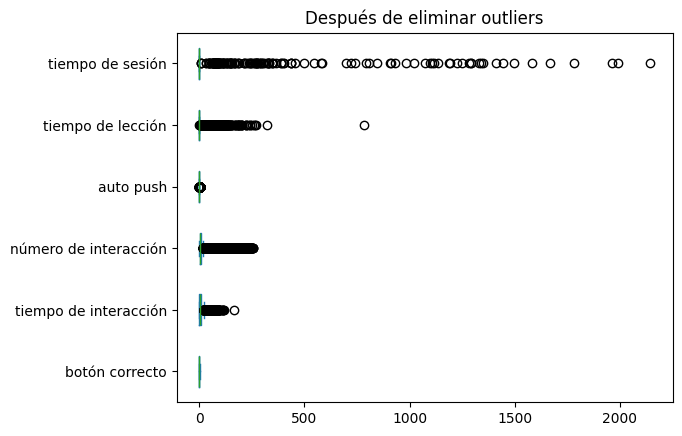

In [72]:
plt.figure(figsize=(10, 5))
df.plot(kind='box', vert =False)
plt.title("Después de eliminar outliers")
plt.show()

In [73]:
y = cuanti
percentiles25 = y.quantile(0.25) #Q1
percentile75 = y.quantile(0.75) #Q3
iqr = percentile75 - percentiles25

Limite_superior_iqr = percentile75 + 1.5*iqr
Limite_inferior_iqr = percentile75 - 1.5*iqr

print("Limite superior permitido",Limite_superior_iqr)
print("Limite inferior permitido",Limite_inferior_iqr)

Limite superior permitido botón correcto            2.500000
tiempo de interacción    21.792686
número de interacción    19.500000
auto push                 0.000000
tiempo de lección         0.000000
tiempo de sesión          0.000000
dtype: float64
Limite inferior permitido botón correcto          -0.500000
tiempo de interacción   -3.058288
número de interacción   -1.500000
auto push                0.000000
tiempo de lección        0.000000
tiempo de sesión         0.000000
dtype: float64


In [74]:
df1 = cuanti[(y<=Limite_superior_iqr) & (y>=Limite_inferior_iqr)]
df1

,botón correcto,tiempo de interacción,número de interacción,auto push,tiempo de lección,tiempo de sesión
0,1,5.399169,1.0,0.0,0.0,0.0
1,0,1.283400,2.0,0.0,0.0,0.0
2,1,2.700226,3.0,0.0,0.0,0.0
3,0,3.050262,4.0,0.0,0.0,0.0
4,0,4.750256,5.0,0.0,0.0,0.0
...,...,...,...,...,...,...
5860,2,0.000000,0.0,NaN,0.0,NaN
5861,0,2.135419,1.0,0.0,0.0,0.0
5862,2,0.000000,0.0,NaN,NaN,0.0
5863,2,0.000000,0.0,NaN,0.0,NaN


In [75]:
df2 = df1.copy()
df2 = df2.fillna(round(df2.mean(),1))
dato_limpios = pd.concat([cuali, df2], axis=1)
dato_limpios.to_csv("Socio_NoNulos_NoOutlayers.csv")

In [76]:
dato_limpios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5865 entries, 0 to 5864
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Administrador          5865 non-null   object        
 1   Usuario                5865 non-null   object        
 2   mini juego             5865 non-null   object        
 3   color presionado       5865 non-null   object        
 4   dificultad             5865 non-null   object        
 5   fecha                  5865 non-null   datetime64[ns]
 6   Juego                  5865 non-null   object        
 7   botón correcto         5865 non-null   int64         
 8   tiempo de interacción  5865 non-null   float64       
 9   número de interacción  5865 non-null   float64       
 10  auto push              5865 non-null   float64       
 11  tiempo de lección      5865 non-null   float64       
 12  tiempo de sesión       5865 non-null   float64       
dtypes: 

**Extraccion Caracteristicas Variables Categóricas**

In [77]:
#Obtengo un análisis univariado de las variables categóricas
freq_tbl (dato_limpios)

     Administrador  frequency  percentage  cumulative_perc
0           ALEIDA       3260    0.555840         0.555840
1          nicolas        440    0.075021         0.630861
2         LEONARDO        371    0.063257         0.694118
3          DENISSE        302    0.051492         0.745610
4     SERGIO ANGEL        243    0.041432         0.787042
5   CARLOS ENRIQUE        228    0.038875         0.825916
6       YAEL DAVID        224    0.038193         0.864109
7           AUSTIN        199    0.033930         0.898039
8         VALENTIN        163    0.027792         0.925831
9            erick        158    0.026939         0.952771
10   IKER BENJAMIN        128    0.021824         0.974595
11          KYTZIA         98    0.016709         0.991304
12        BENJAMIN         51    0.008696         1.000000

----------------------------------------------------------------

               Usuario  frequency  percentage  cumulative_perc
0            LEONARDO         546    0.09309

**Adminsitrador**

In [78]:
#Obtengo un análisis univariado de una variable categórica en específico
tableA = freq_tbl (dato_limpios['Administrador'])
#Elimino las columnas percentage y cumulative perc para trabajar con las frecuencias
tableA = tableA.drop(['percentage','cumulative_perc'],axis=1)
tableA

,Administrador,frequency
0,ALEIDA,3260
1,nicolas,440
2,LEONARDO,371
3,DENISSE,302
4,SERGIO ANGEL,243
5,CARLOS ENRIQUE,228
6,YAEL DAVID,224
7,AUSTIN,199
8,VALENTIN,163
9,erick,158


In [79]:
#Filtro de los valores más relevantes de las variables (mayores a 8)
filtroA = tableA [tableA['frequency']>8]
#Ajusto el índice de mi dataframe
filtroA = filtroA.set_index('Administrador')
filtroA

,frequency
Administrador,
ALEIDA,3260
nicolas,440
LEONARDO,371
DENISSE,302
SERGIO ANGEL,243
CARLOS ENRIQUE,228
YAEL DAVID,224
AUSTIN,199
VALENTIN,163


Text(0, 0.5, 'Frecuencia')

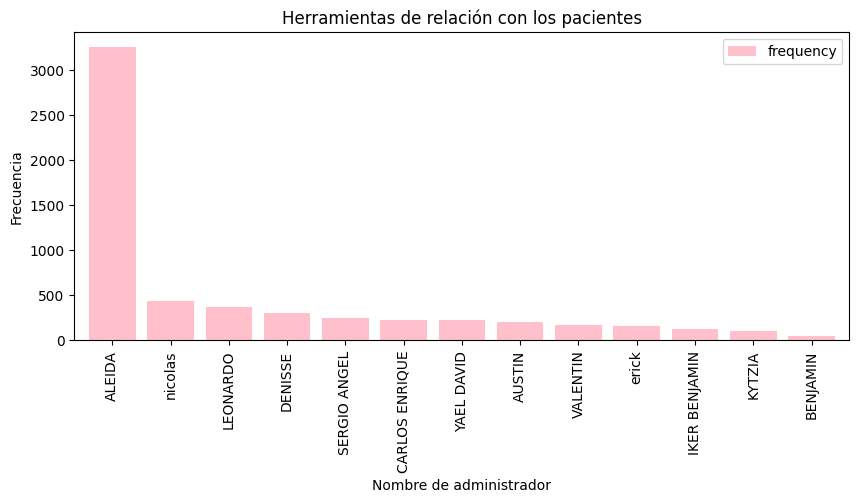

In [80]:
filtroA.plot(kind = 'bar', width = 0.8, figsize=(10,4), color="pink")
plt.title('Herramientas de relación con los pacientes')
plt.xlabel('Nombre de administrador')
plt.ylabel('Frecuencia')

<Axes: xlabel='Administrador'>

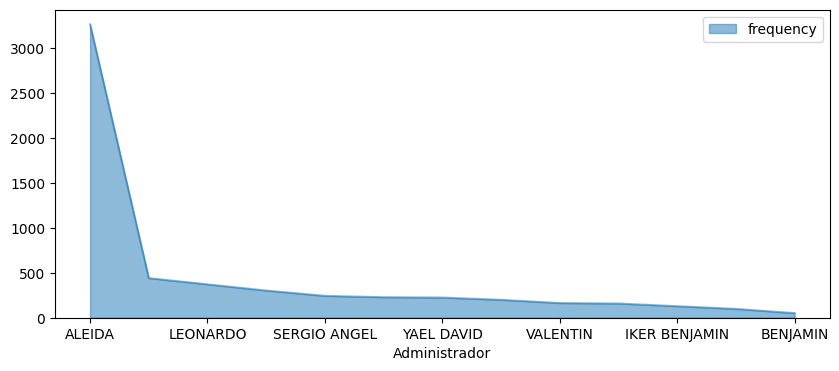

In [81]:
filtroA.plot(kind='area', figsize =(10,4), alpha = 0.5)

<Axes: ylabel='frequency'>

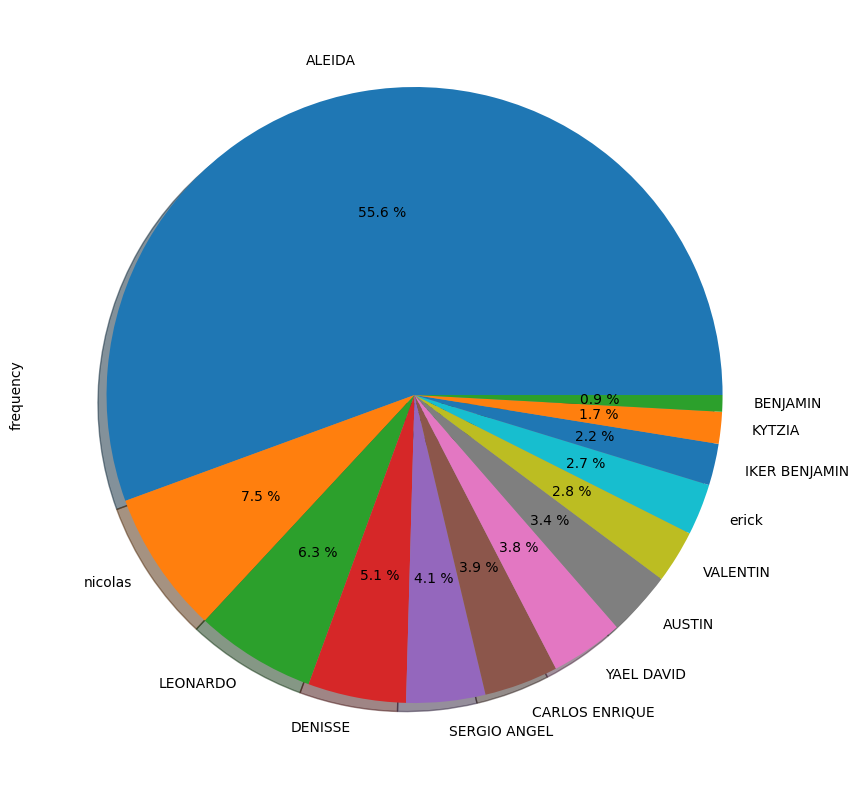

In [82]:
filtroA['frequency'].plot(kind='pie', figsize =(15,10), shadow = True, autopct="%0.1f %%")

**Paciente**

In [83]:
#Obtengo un análisis univariado de una variable categórica en específico
tablep = freq_tbl (dato_limpios['Usuario'])
#Elimino las columnas percentage y cumulative perc para trabajar con las frecuencias
tablep = tablep.drop(['percentage','cumulative_perc'],axis=1)
tablep

,Usuario,frequency
0,LEONARDO,546
1,ALEIDA,487
2,nicolas,440
3,JOSE JAVIER,394
4,LEONARDO,371
5,JESUS ALEJANDRO,356
6,ramiro isai,332
7,ADRIAN,280
8,SERGIO ANGEL,243
9,DENISSE,228


In [84]:
tablep = tablep [tablep['frequency']>200]
filtrop = tablep.set_index('Usuario')
filtrop

,frequency
Usuario,
LEONARDO,546
ALEIDA,487
nicolas,440
JOSE JAVIER,394
LEONARDO,371
JESUS ALEJANDRO,356
ramiro isai,332
ADRIAN,280
SERGIO ANGEL,243


Text(0, 0.5, 'Frecuencia')

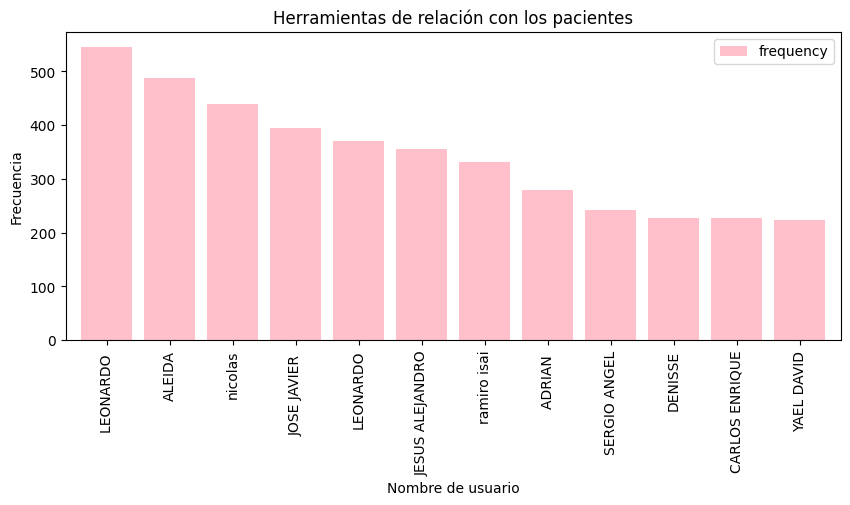

In [85]:
filtrop.plot(kind = 'bar', width = 0.8, figsize=(10,4), color="pink")
plt.title('Herramientas de relación con los pacientes')
plt.xlabel('Nombre de usuario')
plt.ylabel('Frecuencia')

**Mini juego**

In [86]:
#Obtengo un análisis univariado de una variable categórica en específico
table1 = freq_tbl (dato_limpios['mini juego'])
#Elimino las columnas percentage y cumulative perc para trabajar con las frecuencias
table1 = table1.drop(['percentage','cumulative_perc'],axis=1)
table1

,mini juego,frequency
0,Asteroides,1054
1,Restaurante,869
2,Estrellas,813
3,Gusanos,748
4,sonidos y animales,743
5,animales y colores,545
6,figuras y colores,400
7,partes del cuerpo,320
8,Despegue,196
9,Sin interacción,156


In [87]:
#Filtro de los valores más relevantes de las variables (mayores a 8)
filtro = table1 [table1['frequency']>8]
#Ajusto el índice de mi dataframe
filtro = filtro.set_index('mini juego')
filtro

,frequency
mini juego,
Asteroides,1054
Restaurante,869
Estrellas,813
Gusanos,748
sonidos y animales,743
animales y colores,545
figuras y colores,400
partes del cuerpo,320
Despegue,196


<Axes: ylabel='frequency'>

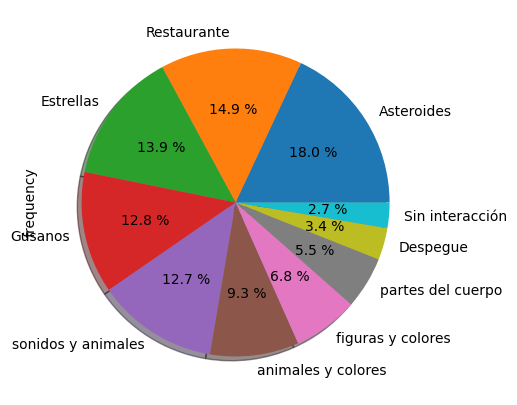

In [88]:
#Realizmaos gráfico de pastel
filtro['frequency'].plot(kind = 'pie',figsize = (10,5),shadow = True, autopct = '%0.1f %%')

Podemos observar que la frecuencia de los minijuegos está muy variada, y que hay tres principales, siendo asteroides, restaurante, y estrellas. Esto se puede deber a la gran preferencia que tienen los pacientes de seleccionar ese juego, o que los terapeutas son los que igual eligen para ellos.

**Color presionado**

In [89]:
#Obtengo un análisis univariado de una variable categórica en específico
table2 = freq_tbl (dato_limpios['color presionado'])
#Elimino las columnas percentage y cumulative perc para trabajar con las frecuencias
table2 = table2.drop(['percentage','cumulative_perc'],axis=1)
table2

,color presionado,frequency
0,violet,1361
1,green,1298
2,yellow,1233
3,blue,1182
4,sin color,762
5,red,29


In [90]:
#Ajusto el índice de mi dataframe
table2 = table2.set_index('color presionado')
table2

,frequency
color presionado,
violet,1361
green,1298
yellow,1233
blue,1182
sin color,762
red,29


Text(0, 0.5, 'Frecuecia')

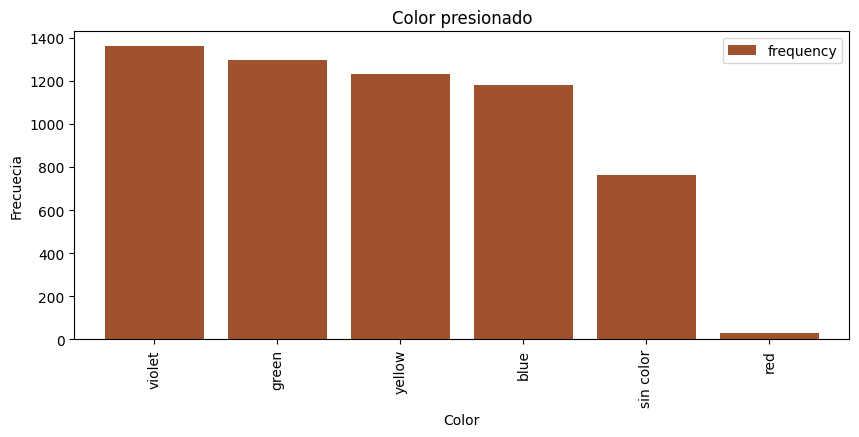

In [91]:
#Realizamos gráfico de barras
table2.plot(kind = 'bar',width = 0.8, figsize = (10,4),color = 'sienna')
plt.title('Color presionado')
plt.xlabel('Color')
plt.ylabel('Frecuecia')

En esta gráfica, usamos de barra para observar la comparación entre los colores. La mayoría tiene una gran participación dentro de la plataforma, pero el rojo es el que casi nunca lo aprietan porque si los pacientes lo hacen, se eliminan del juego.

**Dificultad**

In [92]:
#Obtengo un análisis univariado de una variable categórica en específico
table3 = freq_tbl (dato_limpios['dificultad'])
#Elimino las columnas percentage y cumulative perc para trabajar con las frecuencias
table3 = table3.drop(['percentage','cumulative_perc'],axis=1)
table3

,dificultad,frequency
0,Episodio 1,2357
1,Episodio 2,1493
2,Episodio 3,1292
3,Episodio 4,723


In [93]:
#Ajusto el índice de mi dataframe
table3 = table3.set_index('dificultad')
table3

,frequency
dificultad,
Episodio 1,2357
Episodio 2,1493
Episodio 3,1292
Episodio 4,723


,frequency
dificultad,
Episodio 1,2357
Episodio 2,1493
Episodio 3,1292
Episodio 4,723


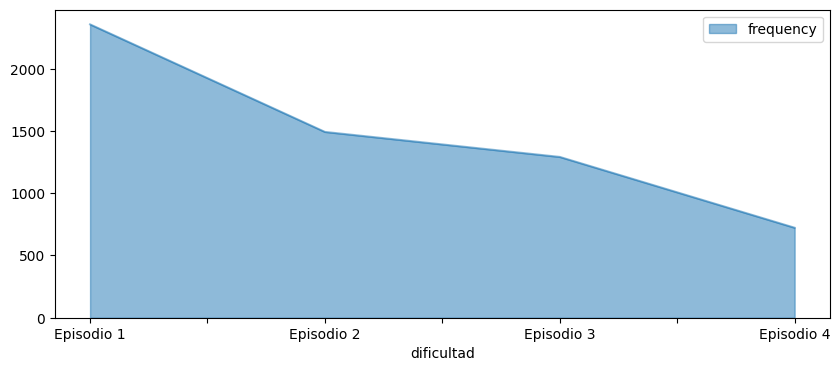

In [94]:
#Realizamos gráfico de área del dataframe filtrado
table3.plot (kind = 'area',figsize = (10,4),alpha = 0.5)
table3

Aquí usamos un gráfico de área porque podemos observar que tanto incrementa o disminuye la frecuencia de acuerdo al nivel o episodio. Observamos que conforme el episodio va incrementando, la frecuencia de su uso va disminuyendo, esto quiere decir que menos pacientes juegan los juegos más difíciles.

**Juego**

In [95]:
#Obtengo un análisis univariado de una variable categórica en específico
table4 = freq_tbl (dato_limpios['Juego'])
#Elimino las columnas percentage y cumulative perc para trabajar con las frecuencias
table4 = table4.drop(['percentage','cumulative_perc'],axis=1)
table4

,Juego,frequency
0,Astro,3799
1,Cadetes,2066


In [96]:
#Ajusto el índice de mi dataframe
table4 = table4.set_index('Juego')
table4

,frequency
Juego,
Astro,3799
Cadetes,2066


<Axes: ylabel='frequency'>

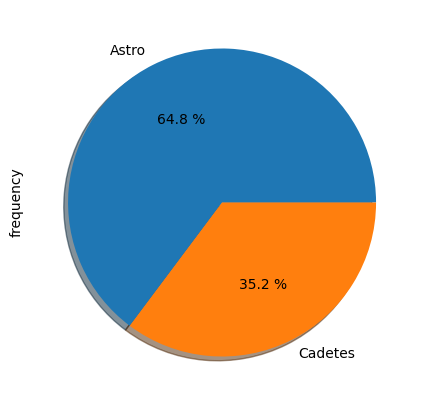

In [97]:
#Realizmaos gráfico de pastel
table4['frequency'].plot(kind = 'pie',figsize = (10,5),shadow = True, autopct = '%0.1f %%')

Escogimos una de pastel para observar la comparación entre el juego de Astros y cadetes, y podemos observar una gran frecuencia en el de Astro, dando a entender que es el más preferido dentro de los jugadores.

**Gráficos de columnas númericas a categoricas**

In [98]:
#Creamos copias de los dos data frame sobre los que trabajaremos
df_sn = df.copy()
df_sno = dato_limpios.copy()

In [99]:
#Extraemos la info del DataFrame limpio de nulos
df_sn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5865 entries, 0 to 5864
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Administrador          5865 non-null   object        
 1   Usuario                5865 non-null   object        
 2   botón correcto         5865 non-null   int64         
 3   tiempo de interacción  5865 non-null   float64       
 4   mini juego             5865 non-null   object        
 5   número de interacción  5865 non-null   float64       
 6   color presionado       5865 non-null   object        
 7   dificultad             5865 non-null   object        
 8   fecha                  5865 non-null   datetime64[ns]
 9   Juego                  5865 non-null   object        
 10  auto push              5865 non-null   int64         
 11  tiempo de lección      5865 non-null   float64       
 12  tiempo de sesión       5865 non-null   float64       
dtypes: 

In [100]:
#Extraemos la info del DataFrame limpio de nulos y de outliers
df_sno.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5865 entries, 0 to 5864
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Administrador          5865 non-null   object        
 1   Usuario                5865 non-null   object        
 2   mini juego             5865 non-null   object        
 3   color presionado       5865 non-null   object        
 4   dificultad             5865 non-null   object        
 5   fecha                  5865 non-null   datetime64[ns]
 6   Juego                  5865 non-null   object        
 7   botón correcto         5865 non-null   int64         
 8   tiempo de interacción  5865 non-null   float64       
 9   número de interacción  5865 non-null   float64       
 10  auto push              5865 non-null   float64       
 11  tiempo de lección      5865 non-null   float64       
 12  tiempo de sesión       5865 non-null   float64       
dtypes: 

In [101]:
#Primero obtendremos el número de datos de la variable tiempo de interacción de ambos data frame
#(Comprobamos que para las tres variables había el mimso número de entradas por lo que n tendría el mismo valor para las tres variables)
print(df_sn['tiempo de interacción']. info())
print(df_sno['tiempo de interacción']. info())
n1=5865
n2=5865

<class 'pandas.core.series.Series'>
RangeIndex: 5865 entries, 0 to 5864
Series name: tiempo de interacción
Non-Null Count  Dtype  
--------------  -----  
5865 non-null   float64
dtypes: float64(1)
memory usage: 45.9 KB
None
<class 'pandas.core.series.Series'>
RangeIndex: 5865 entries, 0 to 5864
Series name: tiempo de interacción
Non-Null Count  Dtype  
--------------  -----  
5865 non-null   float64
dtypes: float64(1)
memory usage: 45.9 KB
None


In [102]:
#Definimos el mínimo y el máximo de la variable seleccionada en ambos dataframe
Max1=df_sn['tiempo de interacción'].max()
Min1=df_sn['tiempo de interacción'].min()
Limites1= [Min1, Max1]
Max2=df_sno['tiempo de interacción'].max()
Min2=df_sno['tiempo de interacción'].min()
Limites2= [Min2, Max2]
print(Limites1)
print(Limites2)

[0.0, 165.1935]
[0.0, 21.78444]


In [103]:
#Calculamos el rango que tendrá de datos
r1=Max1-Min1
r2=Max2-Min2
print(r1)
print(r2)

165.1935
21.78444


In [104]:
#Calculamos el número de intervalos (dado a que todos tienen el mismo n, consideraremos 14 intervalos para las tres variables)
ni1=1+3.32*np.log10(n1)
ni2=1+3.32*np.log10(n2)

print(ni1)
print(ni2)

13.51064981461914
13.51064981461914


In [105]:
#Definimos los intervalos para la variable en ambos dataframe 
intervalos1=np.linspace(0.0, 165.1936, 14)
intervalos2=np.linspace(0.0, 21.78445, 14)
print(intervalos1)
print(intervalos2)

[  0.      12.7072  25.4144  38.1216  50.8288  63.536   76.2432  88.9504
 101.6576 114.3648 127.072  139.7792 152.4864 165.1936]
[ 0.          1.67572692  3.35145385  5.02718077  6.70290769  8.37863462
 10.05436154 11.73008846 13.40581538 15.08154231 16.75726923 18.43299615
 20.10872308 21.78445   ]


In [106]:
#Definimos las categorías para ambos dataframe (dado a que tendremos el mismo número de variables para las tres variables usaremos las mismas listas para las tres variables)
categorias1= ["Muy corto (0 - 12.7)", "Corto (12.7 - 25.4)","Relativamente corto (25.4 - 38.1)", "Moderadamente corto (38.1 - 50.8)",
             "Intermedio bajo (50.8 - 63.5)", "Intermedio (63.5 - 76.2)","Intermedio alto (76.2 - 88.9)", "Moderadamente largo (88.9 - 101.6)",
             "Relativamente largo (101.6 - 114.3)", "Largo (114.3 - 127.0)","Muy largo (127.0 - 139.7)", "Extenso (139.7 - 152.4)", 
             "Muy extenso (152.4 - 165.2)"]
categorias2= ["Muy corto (0 - 1.7)", "Corto (1.7 - 3.3)","Relativamente corto (3.3 - 5)", "Moderadamente corto (5 - 6.7)",
             "Intermedio bajo (6.7 - 8.4)", "Intermedio (8.4 - 10)","Intermedio alto (10 - 11.7)", "Moderadamente largo (11.7 - 13.4)",
             "Relativamente largo (13.4 - 15)", "Largo (15 - 16.7)","Muy largo (16.7 - 18.4)", "Extenso (18.4 - 20.1)", 
             "Muy extenso (20.1 - 21.8)"]

In [107]:
#Finalmente creamos las categorías en la variable del primer datframe
df_sn['tiempo de interacción']=pd.cut(x= df_sn['tiempo de interacción'], bins=intervalos1, labels= categorias1)
df_sn['tiempo de interacción']

0       Muy corto (0 - 12.7)
1       Muy corto (0 - 12.7)
2       Muy corto (0 - 12.7)
3       Muy corto (0 - 12.7)
4       Muy corto (0 - 12.7)
                ...         
5860                     NaN
5861    Muy corto (0 - 12.7)
5862                     NaN
5863                     NaN
5864                     NaN
Name: tiempo de interacción, Length: 5865, dtype: category
Categories (13, object): ['Muy corto (0 - 12.7)' < 'Corto (12.7 - 25.4)' < 'Relativamente corto (25.4 - 38.1)' < 'Moderadamente corto (38.1 - 50.8)' ... 'Largo (114.3 - 127.0)' < 'Muy largo (127.0 - 139.7)' < 'Extenso (139.7 - 152.4)' < 'Muy extenso (152.4 - 165.2)']

In [108]:
#Finalmente creamos las categorías en la variable del segundo datframe
df_sno['tiempo de interacción']=pd.cut(x= df_sno['tiempo de interacción'], bins=intervalos2, labels= categorias2)
df_sno['tiempo de interacción']

0       Moderadamente corto (5 - 6.7)
1                 Muy corto (0 - 1.7)
2                   Corto (1.7 - 3.3)
3                   Corto (1.7 - 3.3)
4       Relativamente corto (3.3 - 5)
                    ...              
5860                              NaN
5861                Corto (1.7 - 3.3)
5862                              NaN
5863                              NaN
5864                              NaN
Name: tiempo de interacción, Length: 5865, dtype: category
Categories (13, object): ['Muy corto (0 - 1.7)' < 'Corto (1.7 - 3.3)' < 'Relativamente corto (3.3 - 5)' < 'Moderadamente corto (5 - 6.7)' ... 'Largo (15 - 16.7)' < 'Muy largo (16.7 - 18.4)' < 'Extenso (18.4 - 20.1)' < 'Muy extenso (20.1 - 21.8)']

In [109]:
#Obtenemos un análisis univariado de la variable categórica y eliminamos las columnas "percentage" y "cumulative_perc"
t1= freq_tbl(df_sn['tiempo de interacción'])
t1 = t1.drop(['percentage','cumulative_perc'], axis=1)
#Creamos el filtro de los valores más representativos
f= t1[t1['frequency']>4]
#Ajustamos el indice del dataframe
f= f.set_index('tiempo de interacción')
f

,frequency
tiempo de interacción,
Muy corto (0 - 12.7),3734
Corto (12.7 - 25.4),606
Relativamente corto (25.4 - 38.1),236
Moderadamente corto (38.1 - 50.8),167
Intermedio bajo (50.8 - 63.5),50
Intermedio (63.5 - 76.2),38
Intermedio alto (76.2 - 88.9),38
Moderadamente largo (88.9 - 101.6),16


Text(0, 0.5, 'Frecuencia')

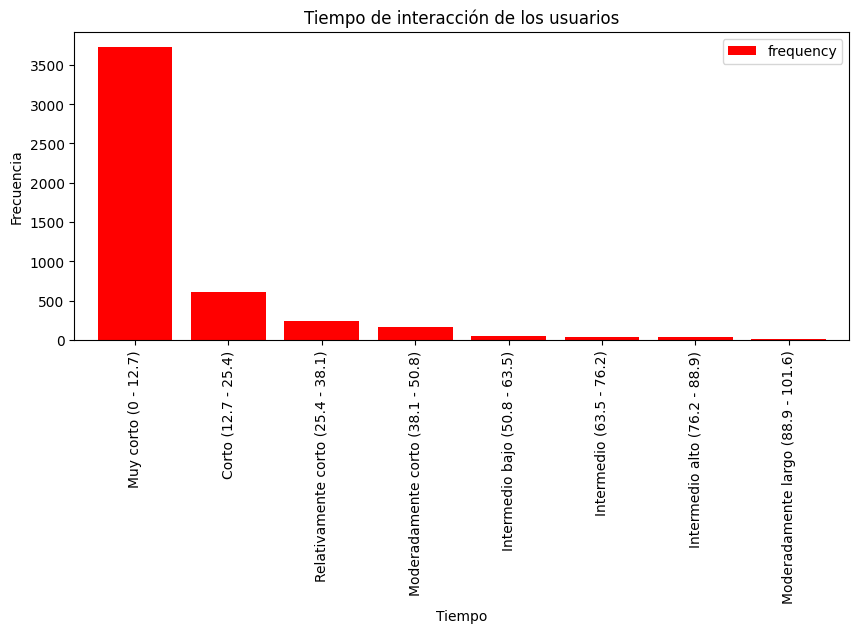

In [110]:
#Realizamos grafico de barras del dataframe filtrado
f.plot(kind = 'bar', width=0.8, figsize=(10,4), color= "red")
plt.title('Tiempo de interacción de los usuarios')
plt.xlabel('Tiempo')
plt.ylabel('Frecuencia')

In [111]:
#Obtenemos un análisis univariado de la variable categórica (segundo frame) y eliminamos las columnas "percentage" y "cumulative_perc"
t2= freq_tbl(df_sno['tiempo de interacción'])
t2 = t2.drop(['percentage','cumulative_perc'], axis=1)
#Creamos el filtro de los valores más representativos
f2= t2[t2['frequency']>100]
#Ajustamos el indice del dataframe
f2= f2.set_index('tiempo de interacción')
f2

,frequency
tiempo de interacción,
Relativamente corto (3.3 - 5),1309
Corto (1.7 - 3.3),1079
Muy corto (0 - 1.7),935
Moderadamente corto (5 - 6.7),422
Intermedio bajo (6.7 - 8.4),254
Intermedio (8.4 - 10),172
Intermedio alto (10 - 11.7),162
Moderadamente largo (11.7 - 13.4),123


Text(0, 0.5, 'Frecuencia')

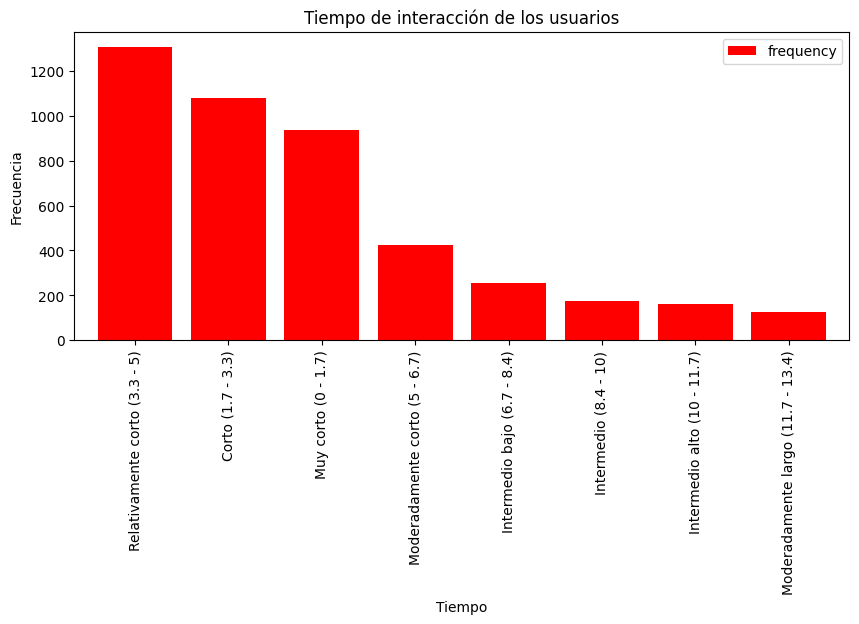

In [112]:
#Realizamos grafico de barras del dataframe filtrado
f2.plot(kind = 'bar', width=0.8, figsize=(10,4), color= "red")
plt.title('Tiempo de interacción de los usuarios')
plt.xlabel('Tiempo')
plt.ylabel('Frecuencia')

In [113]:
#Comprobamos el número de datos de entrada
print(df_sn['tiempo de lección']. info())
print(df_sno['tiempo de lección']. info())

<class 'pandas.core.series.Series'>
RangeIndex: 5865 entries, 0 to 5864
Series name: tiempo de lección
Non-Null Count  Dtype  
--------------  -----  
5865 non-null   float64
dtypes: float64(1)
memory usage: 45.9 KB
None
<class 'pandas.core.series.Series'>
RangeIndex: 5865 entries, 0 to 5864
Series name: tiempo de lección
Non-Null Count  Dtype  
--------------  -----  
5865 non-null   float64
dtypes: float64(1)
memory usage: 45.9 KB
None


In [114]:
#Definimos el mínimo y el máximo de la variable seleccionada en ambos dataframe
max_1=df_sn['tiempo de lección'].max()
min_1=df_sn['tiempo de lección'].min()
limites_1= [min_1, max_1]
max_2=df_sno['tiempo de lección'].max()
min_2=df_sno['tiempo de lección'].min()
limites_2= [min_2, max_2]
print(limites_1)
print(limites_2) #Dado a que observamos un máximo y un mínimo de 0, solo aplicaremos los filtros para el primer dataframe

[0.0, 781.3312]
[0.0, 0.0]


In [115]:
#Definimos los intervalos
intervalos_1=np.linspace(0.0, 781.3313, 14)
intervalos_1

array([  0.        ,  60.10240769, 120.20481538, 180.30722308,
       240.40963077, 300.51203846, 360.61444615, 420.71685385,
       480.81926154, 540.92166923, 601.02407692, 661.12648462,
       721.22889231, 781.3313    ])

In [116]:
categorias_1 = ["Muy corto (0.00 - 60.10)", "Corto (60.10 - 120.20)", "Relativamente corto (120.20 - 180.31)", "Moderadamente corto (180.31 - 240.41)", 
                "Intermedio bajo (240.41 - 300.51)", "Intermedio (300.51 - 360.61)", "Intermedio alto (360.61 - 420.72)", "Moderadamente largo (420.72 - 480.82)", 
                "Relativamente largo (480.82 - 540.92)", "Largo (540.92 - 601.02)", "Muy largo (601.02 - 661.13)", "Extenso (661.13 - 721.23)", 
                "Muy extenso (721.23 - 781.33)"]

In [117]:
#Finalmente creamos las categorías en la variable del primer datframe
df_sn['tiempo de lección']=pd.cut(x= df_sn['tiempo de lección'], bins=intervalos_1, labels= categorias_1)
df_sn['tiempo de lección']

0                            NaN
1                            NaN
2                            NaN
3                            NaN
4                            NaN
                  ...           
5860                         NaN
5861                         NaN
5862    Muy corto (0.00 - 60.10)
5863                         NaN
5864                         NaN
Name: tiempo de lección, Length: 5865, dtype: category
Categories (13, object): ['Muy corto (0.00 - 60.10)' < 'Corto (60.10 - 120.20)' < 'Relativamente corto (120.20 - 180.31)' < 'Moderadamente corto (180.31 - 240.41)' ... 'Largo (540.92 - 601.02)' < 'Muy largo (601.02 - 661.13)' < 'Extenso (661.13 - 721.23)' < 'Muy extenso (721.23 - 781.33)']

In [118]:
#Obtenemos un análisis univariado de la variable categórica y eliminamos las columnas "percentage" y "cumulative_perc"
t_1= freq_tbl(df_sn['tiempo de lección'])
t_1 = t_1.drop(['percentage','cumulative_perc'], axis=1)
#Creamos el filtro de los valores más representativos
f_1= t_1[t_1['frequency']>6]
#Ajustamos el indice del dataframe
f_1= f_1.set_index('tiempo de lección')
f_1

,frequency
tiempo de lección,
Muy corto (0.00 - 60.10),368
Corto (60.10 - 120.20),158
Relativamente corto (120.20 - 180.31),35
Moderadamente corto (180.31 - 240.41),16


<Axes: xlabel='tiempo de lección'>

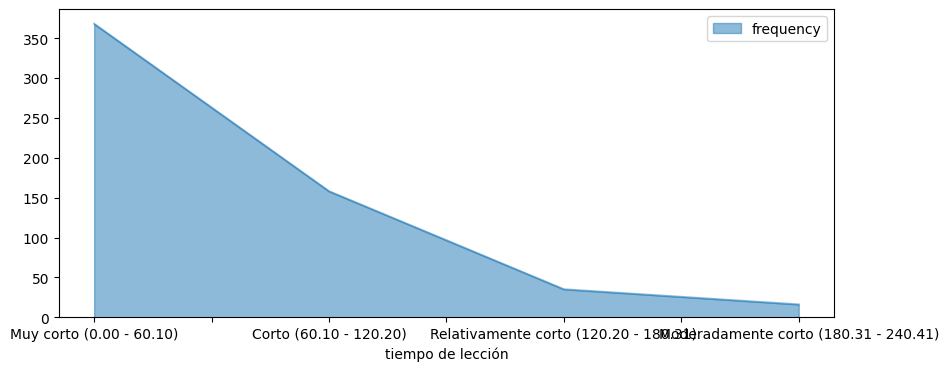

In [119]:
#Realizamos grafico de área del dataframe filtrado
f_1.plot(kind='area', figsize=(10,4),alpha = 0.5)

In [120]:
#Definimos el mínimo y el máximo de la variable seleccionada en ambos dataframe
Max__1=df_sn['tiempo de sesión'].max()
Min__1=df_sn['tiempo de sesión'].min()
Limites__1= [Min__1, Max__1]
Max__2=df_sno['tiempo de sesión'].max()
Min__2=df_sno['tiempo de sesión'].min()
Limites__2= [Min__2, Max__2]
print(Limites__1)
print(Limites__2) #Dado a que observamos un máximo y un mínimo de 0, solo aplicaremos los filtros para el primer dataframe

[0.0, 2144.452]
[0.0, 0.0]


In [121]:
#Definimos los intervalos
intervalos__1=np.linspace(0.0, 2144.453, 14)
intervalos__1

array([   0.        ,  164.95792308,  329.91584615,  494.87376923,
        659.83169231,  824.78961538,  989.74753846, 1154.70546154,
       1319.66338462, 1484.62130769, 1649.57923077, 1814.53715385,
       1979.49507692, 2144.453     ])

In [122]:
categorias__1 = ["Muy corto (0.00 - 164.96)", "Corto (164.96 - 329.92)", "Relativamente corto (329.92 - 494.87)", "Moderadamente corto (494.87 - 659.83)", 
                "Intermedio bajo (659.83 - 824.79)", "Intermedio (824.79 - 989.75)", "Intermedio alto (989.75 - 1154.71)", "Moderadamente largo (1154.71 - 1319.66)", 
                "Relativamente largo (1319.66 - 1484.62)", "Largo (1484.62 - 1649.58)", "Muy largo (1649.58 - 1814.54)", "Extenso (1814.54 - 1979.50)", 
                "Muy extenso (1979.50 - 2144.45)"]

In [123]:
#Finalmente creamos las categorías en la variable del primer datframe
df_sn['tiempo de sesión']=pd.cut(x= df_sn['tiempo de sesión'], bins=intervalos__1, labels= categorias__1)
df_sn['tiempo de sesión']

0                                         NaN
1                                         NaN
2                                         NaN
3                                         NaN
4                                         NaN
                        ...                  
5860    Relativamente corto (329.92 - 494.87)
5861                                      NaN
5862                                      NaN
5863                Muy corto (0.00 - 164.96)
5864                                      NaN
Name: tiempo de sesión, Length: 5865, dtype: category
Categories (13, object): ['Muy corto (0.00 - 164.96)' < 'Corto (164.96 - 329.92)' < 'Relativamente corto (329.92 - 494.87)' < 'Moderadamente corto (494.87 - 659.83)' ... 'Largo (1484.62 - 1649.58)' < 'Muy largo (1649.58 - 1814.54)' < 'Extenso (1814.54 - 1979.50)' < 'Muy extenso (1979.50 - 2144.45)']

In [124]:
#Obtenemos un análisis univariado de la variable categórica y eliminamos las columnas "percentage" y "cumulative_perc"
t__1= freq_tbl(df_sn['tiempo de sesión'])
t__1 = t__1.drop(['percentage','cumulative_perc'], axis=1)
#Creamos el filtro de los valores más representativos
f__1= t__1[t__1['frequency']>7]
#Ajustamos el indice del dataframe
f__1= f__1.set_index('tiempo de sesión')
f__1

,frequency
tiempo de sesión,
Muy corto (0.00 - 164.96),70
Corto (164.96 - 329.92),33
Relativamente corto (329.92 - 494.87),14


<Axes: ylabel='frequency'>

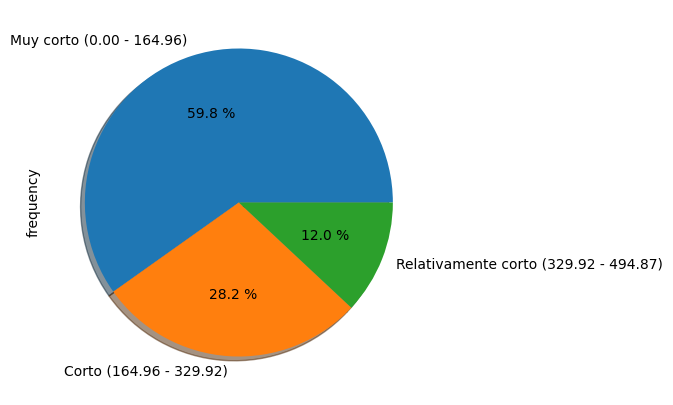

In [125]:
#Realizamos grafico de pastel del dataframe filtrado
f__1["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")